In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import warnings
import warnings
warnings.filterwarnings("ignore")

# We will use some methods from the sklearn module
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
df = pd.read_csv("cp_new_reg11.csv")

# del df['dTLB-load-misses']
# del df['l2_rqsts.demand_data_rd_miss']
# del df['LLC-load-misses']
# del df['LLC-store-misses']
# del df['L1-dcache-load-misses']
# del df['branch-misses']
# del'iTLB-load-misses']

In [3]:
df.head()

df

,branch-load-misses,branch-misses,iTLB-load-misses,dTLB-load-misses,dTLB-store-misses,L1-icache-load-misses,L1-dcache-load-misses,l1d_pend_miss.pending_cycles,l2_rqsts.code_rd_miss,l2_rqsts.all_demand_miss,l2_rqsts.demand_data_rd_miss,l1d_pend_miss.pending_cycles.1,l2_rqsts.code_rd_miss.1,l2_rqsts.rfo_miss,cache-misses,LLC-load-misses,LLC-store-misses,l1d_pend_miss.l2_stall,l2_rqsts.swpf_miss,CPI
0,3341898,3353066,1595,102090,423,626049,891864,68197506,47461,286250,228697,71720016,30398,4186,758585,199456,763,16124,0,1.90
1,3448695,3463207,1330,98844,541,604709,901535,71201354,46809,295775,240744,81105470,31723,4138,742037,210306,758,19652,0,1.84
2,3406659,3409143,1832,107919,759,573624,1000781,77533958,41595,291323,227842,69209926,31412,5129,789117,243946,1894,21877,0,1.84
3,3522758,3463051,1946,93420,509,535945,949348,70386446,45679,264180,202978,67892403,27041,4490,694400,202037,934,19798,0,1.84
4,3449649,3424729,1614,106926,529,509555,895153,73184093,43130,278614,221976,70715916,32482,6328,808439,249155,3476,20432,0,1.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1402,2709611,2721912,1671,105795,611,804263,1021068,62350432,27866,300232,266392,60106836,33961,6593,748062,207973,1371,34584,0,1.64
1403,3253956,3295668,1704,101360,410,634488,1016092,62852283,25700,282666,255362,56424411,31198,5475,712604,202377,1150,38795,0,1.62
1404,2943067,2965672,1649,117411,582,728722,1029686,64985572,28728,324460,284951,62496997,31819,4332,759877,202034,788,30810,0,1.67
1405,2751033,2775814,1597,112590,384,691161,979906,59620394,26822,289682,260800,61832654,33244,4874,789121,216104,1321,31548,0,1.62


In [4]:
df.shape

(1407, 20)

In [5]:
print(df.corr())

                                branch-load-misses  branch-misses  \
branch-load-misses                        1.000000       0.993298   
branch-misses                             0.993298       1.000000   
iTLB-load-misses                         -0.008958       0.009318   
dTLB-load-misses                          0.134948       0.130457   
dTLB-store-misses                        -0.336312      -0.332754   
L1-icache-load-misses                    -0.193900      -0.207971   
L1-dcache-load-misses                    -0.016290      -0.012176   
l1d_pend_miss.pending_cycles             -0.146821      -0.184813   
l2_rqsts.code_rd_miss                     0.050934       0.026456   
l2_rqsts.all_demand_miss                 -0.023251      -0.022466   
l2_rqsts.demand_data_rd_miss             -0.202709      -0.212601   
l1d_pend_miss.pending_cycles.1            0.109829       0.090564   
l2_rqsts.code_rd_miss.1                   0.112130       0.120074   
l2_rqsts.rfo_miss                 

In [6]:
print(df.describe())

       branch-load-misses  branch-misses  iTLB-load-misses  dTLB-load-misses  \
count        1.407000e+03   1.407000e+03       1407.000000       1407.000000   
mean         3.061359e+06   3.064147e+06       1586.460554     110792.921819   
std          3.036876e+05   2.964516e+05        468.141604      11796.193326   
min          3.440000e+02   3.860000e+02        464.000000      32783.000000   
25%          2.876484e+06   2.882771e+06       1260.500000     103156.000000   
50%          3.075789e+06   3.073837e+06       1515.000000     110046.000000   
75%          3.261210e+06   3.263397e+06       1844.500000     118364.500000   
max          3.785594e+06   3.783351e+06       5705.000000     150035.000000   

       dTLB-store-misses  L1-icache-load-misses  L1-dcache-load-misses  \
count        1407.000000           1.407000e+03           1.407000e+03   
mean         1168.626866           7.713166e+05           1.080345e+06   
std         12417.364271           2.287500e+05          

In [7]:

li = ['branch-load-misses', 'L1-dcache-load-misses', 'l1d_pend_miss.pending_cycles', 'l2_rqsts.code_rd_miss', 'l1d_pend_miss.pending_cycles', 'l2_rqsts.code_rd_miss', 'LLC-load-misses']

In [8]:
X = df[li]
y = df['CPI']

In [9]:
from sklearn.preprocessing import minmax_scale
X=minmax_scale(X)
y=minmax_scale(y)

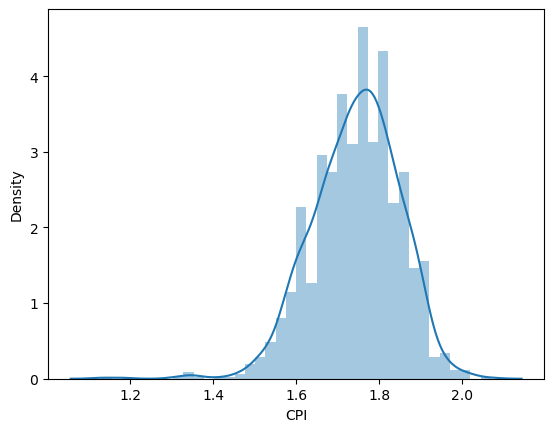

In [10]:
sns.distplot(df['CPI']);

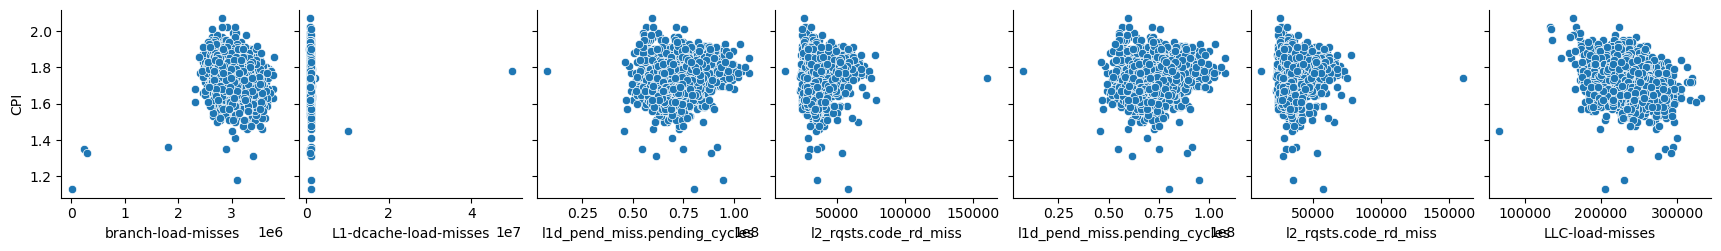

In [11]:
sns.pairplot(df, x_vars=li, y_vars='CPI', aspect=1, kind='scatter')
plt.show()

<Axes: >

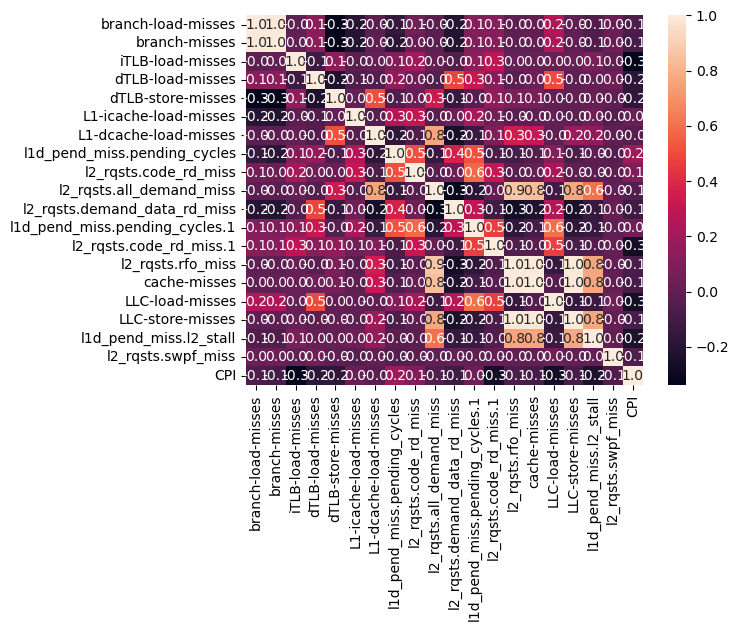

In [12]:
plt.show()
sns.heatmap(df.corr(), annot=True, fmt=".1f")

In [13]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [14]:
y_train.shape

(1125,)

In [15]:
y_test.shape

(282,)

In [16]:
reg_model = linear_model.LinearRegression()

In [17]:
#Fitting the Multiple Linear Regression model
# reg_model = LinearRegression().fit(X_train, y_train)
# print(f"Linear Regression-Training set score: {reg_model.score(X_train, y_train):.2f}")
# print(f"Linear Regression-Test set score: {reg_model.score(X_test, y_test):.2f}")

In [18]:
# from sklearn.linear_model import Ridge
# reg_model = Ridge(alpha=0.9).fit(X_train, y_train)
# print(f"Ridge Regression-Training set score: {reg_model.score(X_train, y_train):.2f}")
# print(f"Ridge Regression-Test set score: {reg_model.score(X_test, y_test):.2f}")

In [19]:

#reg_model=LinearRegression(positive= True)
reg_model.fit(X_train,y_train)


LinearRegression()

In [20]:
#Printing the model coefficients
print('Intercept: ',reg_model.intercept_)
# pair the feature names with the coefficients
list(zip(X, reg_model.coef_))

Intercept:  0.5827648727228468


[(array([0.88278291, 0.00278647, 0.60460406, 0.24071736, 0.60460406,
         0.24071736, 0.50399232]),
  0.12413734511570196),
 (array([0.9109969 , 0.00298381, 0.6345534 , 0.23633959, 0.6345534 ,
         0.23633959, 0.54485707]),
  0.030932549202003716),
 (array([0.89989168, 0.00500895, 0.69769152, 0.20133079, 0.69769152,
         0.20133079, 0.67155663]),
  0.10768799871279408),
 (array([0.93056311, 0.00395945, 0.62642851, 0.22875233, 0.62642851,
         0.22875233, 0.51371323]),
  0.04144242626423884),
 (array([0.91124893, 0.00285359, 0.65432195, 0.21163737, 0.65432195,
         0.21163737, 0.69117547]),
  0.10768799871279397),
 (array([0.91938102, 0.00509645, 0.68538234, 0.19274309, 0.68538234,
         0.19274309, 0.74188543]),
  0.04144242626423892),
 (array([0.91888171, 0.00558509, 0.69546818, 0.20715888, 0.69546818,
         0.20715888, 0.72225528]),
  -0.29517867256960206)]

In [21]:
#Predicting the Test and Train set result 
y_pred= reg_model.predict(X_test)  
x_pred= reg_model.predict(X_train) 

In [22]:
print("Prediction for test set: {}".format(y_pred))
print()
print("Prediction for train set: {}".format(x_pred))

Prediction for test set: [0.73265813 0.56420249 0.66482756 0.582186   0.64038818 0.68244663
 0.69451093 0.65081939 0.67269344 0.66001978 0.64602364 0.57901737
 0.57624824 0.61571257 0.64774483 0.72348471 0.60651089 0.73872682
 0.69506312 0.59588367 0.67265305 0.64268229 0.70054513 0.58701877
 0.6615359  0.65242867 0.66786349 0.58995537 0.595565   0.62498943
 0.6912623  0.58792948 0.69909135 0.68995739 0.63112669 0.66548399
 0.68803075 0.6182989  0.63872639 0.69004632 0.6969914  0.63659601
 0.6760703  0.70279648 0.63415463 0.68106453 0.60488007 0.68854279
 0.68337339 0.71612376 0.6657208  0.64383948 0.63724958 0.70254362
 0.63235249 0.70918721 0.66636692 0.64730667 0.61903815 0.59730512
 0.56886888 0.65692384 0.61977166 0.64049261 0.67663044 0.67053739
 0.56204004 0.66777148 0.68660325 0.61942452 0.67539086 0.59908979
 0.72143628 0.67744019 0.63728737 0.65218935 0.66871127 0.73469229
 0.61598949 0.69945893 0.63265548 0.59368707 0.60086147 0.68562702
 0.61207427 0.6186421  0.64282268 0.6

In [23]:
#Actual value and the predicted value
reg_model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred , '  Residue': y_test-y_pred})


In [24]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r_squared = reg_model.score(X, y)


print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', r2)
print('R^2 value :', r_squared)
print('F-ststistic value : ' , r2/mse)

print()
print()
mae = metrics.mean_absolute_error(y_train, x_pred)
mse = metrics.mean_squared_error(y_train, x_pred)
r2 = np.sqrt(metrics.mean_squared_error(y_train, x_pred))
r_squared = reg_model.score(X, y)


print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', r2)
print('R^2 value :', r_squared)
# print('Adjusted R^2 value : ' , adjusted_r^2)


Mean Absolute Error: 0.07888399454894121
Mean Square Error: 0.0100545454997187
Root Mean Square Error: 0.10027235660798393
R^2 value : 0.12039584649489399
F-ststistic value :  9.972838315843246


Mean Absolute Error: 0.08206081779483496
Mean Square Error: 0.011165496271606817
Root Mean Square Error: 0.10566691190532075
R^2 value : 0.12039584649489399


In [25]:
#display adjusted R-squared
1 - (1-reg_model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)

0.11599468203847096

In [26]:
import statsmodels.api as sm
X_train=sm.add_constant(X_train)
model=sm.OLS(y_train,X_train).fit()
p_values=model.summary2().tables[1]['P>|t|']
p_values

const    4.265537e-41
x1       2.316719e-03
x2       7.719362e-01
x3       1.989141e-09
x4       1.573910e-01
x5       1.989141e-09
x6       1.573910e-01
x7       2.773698e-23
Name: P>|t|, dtype: float64

In [27]:
import itertools


all_columns = li;

num_columns_to_select = 7


column_combinations = list(itertools.combinations(all_columns, num_columns_to_select))

# column_combinations
for combination in column_combinations:
    X=df[list(combination)]
    y = df['CPI']
    from sklearn.preprocessing import minmax_scale
    X=minmax_scale(X)
    y=minmax_scale(y)
    X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)
    reg_model = linear_model.LinearRegression()
    reg_model.fit(X_train,y_train)
    count=0
    flag=0
    for j in  reg_model.coef_:
        if j>=0:
            count+=1
    if count==6:
        print(combination)


('branch-load-misses', 'L1-dcache-load-misses', 'l1d_pend_miss.pending_cycles', 'l2_rqsts.code_rd_miss', 'l1d_pend_miss.pending_cycles', 'l2_rqsts.code_rd_miss', 'LLC-load-misses')
